<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/20150711_Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **데이터 불러오기**

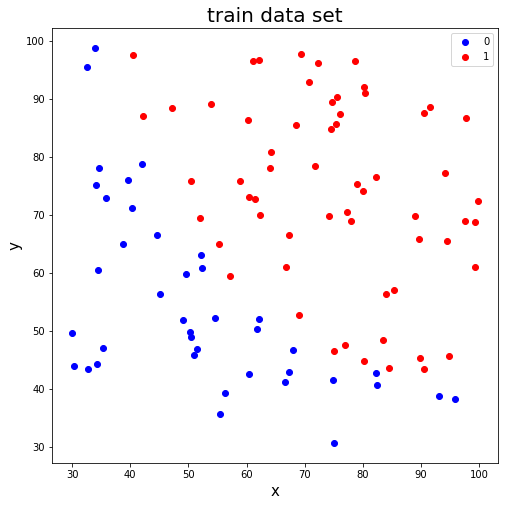

In [69]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data.txt", delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]

y_label0 = y[label == 0]
y_label1 = y[label == 1]

#라벨이 0인 것은 파란색 라벨이 1인 것은 빨간색
plt.figure(figsize=(8, 8))
plt.title("train data set", fontsize = 20)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.scatter(x_label0, y_label0, c='b', label = "0")
plt.scatter(x_label1, y_label1, c='r', label = "1")
plt.legend(loc = "best")
plt.show()

# **Logistic Regression Implementation**

In [0]:
#Z 생성 함수
def generate_z(theta0, theta1, theta2, x, y):
  return theta0 + theta1 * x + theta2 * y
#로지스틱 함수
def Logit(z):
  return 1 / (1 + np.exp(-z))
#energy 구할 때 log0일 때 오버플로가 나는 것을 방지
def apply_Logit(logit):
  li = []
  for i in logit:
    if i == 1 :
      li.append(i - 1e-9)
    elif i == 0 :
      li.append(i + 1e-9)
    else:
      li.append(i)
  return np.array(li)
#로지스틱 함수 미분
def Logit_prime(logit):
  return logit * (1-logit)
#loss function 구현      
def energy(sigma):
  length = len(sigma)
  return np.sum(-label * np.log(sigma) - (1-label) * np.log(1-sigma)) / length


In [71]:
#세타 값 정의
theta0 = 20
theta1 = 100
theta2 = -80

length = len(label)

z = generate_z(theta0, theta1, theta2, x, y)
sigma = apply_Logit(Logit(z))
temp_energy = energy(sigma)

#세타 및 loss 저장소
theta0_val = [theta0]
theta1_val = [theta1]
theta2_val = [theta2]
energy_val = [temp_energy]

#학습률
alpha = 0.02

#반복 수
epoch = 250000

for i in range(epoch):
  gra_theta0 = np.sum(sigma - label) / length
  gra_theta1 = np.sum((sigma - label) * x) / length
  gra_theta2 = np.sum((sigma - label) * y) / length

  theta0 -= alpha * gra_theta0
  theta1 -= alpha * gra_theta1
  theta2 -= alpha * gra_theta2
  
  z = generate_z(theta0, theta1, theta2, x, y)
  sigma = apply_Logit(Logit(z))
  next_energy = energy(sigma)

  theta0_val.append(theta0)
  theta1_val.append(theta1)
  theta2_val.append(theta2)
  energy_val.append(next_energy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


# **결과값 시각화**

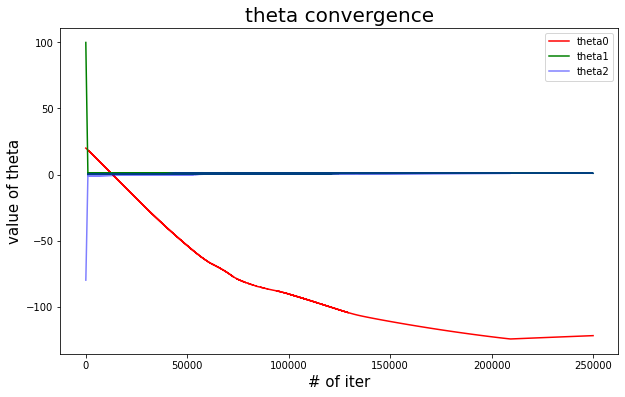

In [72]:
#세타 값 시각화
plt.figure(figsize = (10,6))
plt.title("theta convergence",fontsize = 20)
plt.xlabel("# of iter", fontsize = 15)
plt.ylabel("value of theta", fontsize = 15)
plt.plot(theta0_val, c = "red" , label = "theta0")
plt.plot(theta1_val, c = "green" , label = "theta1")
plt.plot(theta2_val, c = "blue" ,  label = "theta2", alpha = 0.5)
plt.legend(loc = "best")
plt.show()

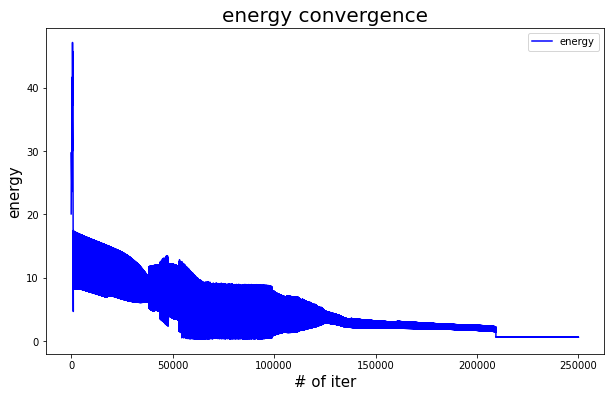

In [73]:
#loss 값 시각화
plt.figure(figsize = (10,6))
plt.title("energy convergence",fontsize = 20)
plt.xlabel("# of iter", fontsize = 15)
plt.ylabel("energy", fontsize = 15)
plt.plot(energy_val,c = "blue", label = "energy")
plt.legend(loc = "best")
plt.show()

# **컬러맵을 이용한 분류확률 시각화**

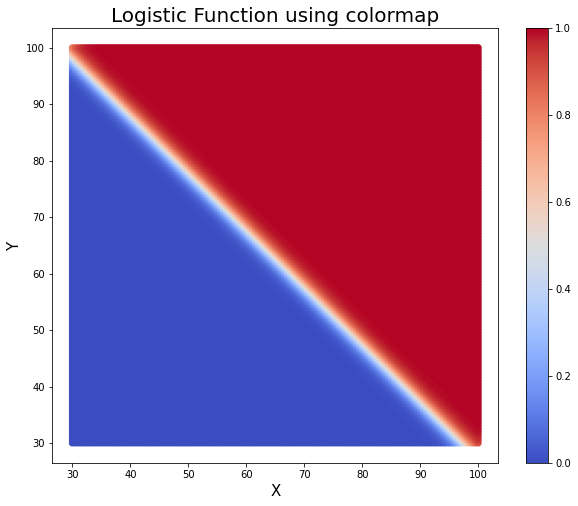

In [103]:
from matplotlib import cm
import pandas as pd
temp_x = np.arange(30,100.5,0.5)
temp_y = np.arange(30,100.5,0.5)

#모든 그리드 좌표 표현하기
temp_X, temp_Y = np.meshgrid(temp_x,temp_y)

#X,Y값에 맞는 로지스틱 함수값 구하기
sigma_XY = Logit(generate_z(theta0,theta1,theta2,temp_X,temp_Y))

#x좌표, y좌표 및 색깔을 로지스틱 함수값으로 그라데이션 플랏!
plt.figure(figsize = (10,8))
plt.title("Logistic Function using colormap",fontsize = 20)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.scatter(temp_X,temp_Y,c = sigma_XY, cmap = cm.coolwarm)
plt.colorbar()
plt.show()